<a href="https://colab.research.google.com/github/121deepti/bike-sharing-demand-prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  -Bike Sharing Demand Prediction 



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

This project is on the prediction of Bike Rental Demand in Seoul(South Korea).The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.This project is based on supervised learning approach regrssion problem.It follows all the assumptions of regression model.The dependent variable is of course the Rented Bike Count and other features are independent variables.
There are several steps in completing this project.First checked the distribution of data and find the symmetricity and skewness and take corrective measures.
Then ckecked for outliers and deal with them.After dealing with multicollinerity and done with scaling divide the dataset into train test and fit into Linear Regression model,Ridge Regression,Lasso Regression and Random Forest Regressor and check their results using different Evaluation metrics.


  

# **GitHub Link -**

https://github.com/121deepti/bike-sharing-demand-prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import files
file=files.upload()

In [ ]:
bike_df=pd.read_csv(io.BytesIO(file['SeoulBikeData.csv']),encoding= 'unicode_escape')

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

In [ ]:
bike_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

In [ ]:
# Visualizing the missing values
sn.heatmap(data=bike_df.isnull(),cbar=False)

### What did you know about your dataset?

This dataset belongs to bike sharing demand information so we have to find insights from this data about the predicted demand of bikes for rent.There are 8760 rows and  14 columns.
There are no duplicate and null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
bike_df.columns

In [ ]:
# Dataset Describe 'all' includes all the columns including catergorical
bike_df.describe(include='all')

### Date: Date of when bike is rent out
### Rented Bike Count: Total Bike rent out(Target feature)
### Hour:Bike rent out in which hour of day(0-23)
### Temperature(°C):Temp of the bike rent out day in centigrade
### Humidity(%):Humidity on that day in %age form
### Solar Radiation (MJ/m2):Solar radiation measure on that day
### Rainfall:Rain fall on that day
### Snowfall:Snow fall on that day
### Seasons:Contains season info(Spring,Summer,Autumn,Winter)
### Holiday:that day was a public holiday or not(excluding weekends i.e. Saturday and Sundays)
### Functioning day:That day was a working day or not.
### Wind Speed: Wind Speed on that day
### Visibility: Maximum visibility(per 10 m)
### Dew Point Temperature: Dew point Temp (degree C)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique(),".")

##Renaming Columns

In [ ]:
#Make a seperate copy of data frame
df=bike_df.copy()

In [ ]:
#Renaming column name by removing their units and spaces for easy understanding and analysis
df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Solar Radiation (MJ/m2)':'Solar_Radiation',
                       'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature','Rented Bike Count':
                       'Rented_Bike_Count','Functioning Day': 'Functioning_day'}
                       ,inplace=True)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Creating a copy of dataframe
df_cpy=df.copy()
#Finding the range of date column
df_cpy['Date'].unique()
#By this we came to know that date lies between 01/12/2017 and 30/11/2018 i.e. around one year that means we only need to analyse month level data.

In [ ]:
#Changing datatype of Date feature from object to date type and deriving Day and Month columns from Date column 
df_cpy.Date=pd.to_datetime(df_cpy.Date,format='%d/%m/%Y')
df_cpy['Year'] = df_cpy['Date'].dt.year
df_cpy['Month'] = df_cpy['Date'].dt.month_name()
df_cpy.head()

In [ ]:
#Find the year value
df_cpy['Year'].value_counts()

In [ ]:
#Average Bike demand on  monthly basis
df_cpy.groupby(['Month'])['Rented_Bike_Count'].mean().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Top 5 Bike demand on hourly and monthly basis.
df_cpy.groupby(['Month','Hour'])['Rented_Bike_Count'].mean().nlargest().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Top 5 Bike demand on hourly basis.
df_cpy.groupby(['Hour'])['Rented_Bike_Count'].mean().nlargest().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Bike demand on holiday v/s no holiday monthly basis
df_cpy.groupby(['Month','Holiday'])['Rented_Bike_Count'].mean().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Bike demand on functioning/nonfunctioning day on monthly basis
df_cpy.groupby(['Month','Functioning_day'])['Rented_Bike_Count'].mean().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Bike demand on holiday v/s on holiday hourly basis
df_cpy.groupby(['Hour','Holiday'])['Rented_Bike_Count'].mean().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Top 5 Bike demand in each season
df_cpy.groupby(['Seasons'])['Rented_Bike_Count'].mean().nlargest().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Bike demand on functioning/nonfunctioning day on hourly basis
df_cpy.groupby(['Hour','Functioning_day'])['Rented_Bike_Count'].mean().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Bike Demand on Functioning v/s Non Functioning day
df_cpy.groupby(['Functioning_day'])['Rented_Bike_Count'].mean().reset_index(name="Avg Rented Bike Count")

In [ ]:
#Divide the dataset based on Rented Bike Count
df_zero_cnt=df_cpy[df_cpy['Rented_Bike_Count']==0]
df_nonzero_cnt=df_cpy[df_cpy['Rented_Bike_Count']!=0]

In [ ]:
#Derive the statiscs when Rented Bike Count is 0
df_zero_cnt.describe(include='all')

In [ ]:
#Statistics when Rented Bike count is nonzero
df_nonzero_cnt.describe(include='all')

### What all manipulations have you done and insights you found?

Here,I have changed the data type of date column  and fetch column 'Month' and 'Year',also rename some columns for further analysis. 
  In the season of summer (May,June,July) and at 18th,19th hour when there is no holiday ,there is high bike demand.
In Summer season there is highest number of demand and in winter(Dec,Jan,Feb) the demand is very less.
There is no demand of bikes in case of Non Functioning day.
We analyze the features when Rented Bike Count is 0 and when the demand is nonzero.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#Making seperate list of numerical columns and removing target variable from the list
numerical_cols=df.describe().columns.tolist()
numerical_cols.remove("Rented_Bike_Count")
print(numerical_cols)

In [ ]:
#Making seperate list of categorical columns
categorical_cols=df.describe(include=['object','category']).columns.tolist()
print(categorical_cols)

#### Chart - 1  Distribution of Depenedent variable

In [ ]:
fig=plt.figure(figsize=(7,7))
ax=fig.gca()
sn.distplot(df_cpy.Rented_Bike_Count)
ax.set_title("skewness "+str(df_cpy['Rented_Bike_Count'].skew()))

##### 1. Why did you pick the specific chart?

This chart is useful in analysis of distribution of target variable.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the distribution of target variable i.e. Rented_bike_count. It is clear that the distribution is highly right skewed. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Due to highly skewed data,it is difficult for an investor to predict the trend in the data set.

#### Chart - 2  Dependent variable after reducing skewness

In [ ]:
# Chart - 2 
fig=plt.figure(figsize=(7,7))
ax=fig.gca()
sn.distplot(np.sqrt(df_cpy.Rented_Bike_Count))
ax.set_title("skewness "+str(np.sqrt(df_cpy['Rented_Bike_Count']).skew()))

##### 1. Why did you pick the specific chart?

I want to see the result after handling skewness

##### 2. What is/are the insight(s) found from the chart?

After applying square root transformation y variable is now having low skewness and looking nearly normally distributed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Now it is easy to find the trend of data after transformation.

#### Chart - 3  Plot histogram for each numerical column

In [ ]:
fig=plt.figure(figsize=(10,7))
for index,item in enumerate(numerical_cols):
  plt.subplot(3,3,index+1)
  feature=df[item]
  sn.distplot(df[item])
  sk=round(feature.skew(),2)
  ax=fig.gca()
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(item+'  skewness'+str(sk))
plt.tight_layout() 

##### 1. Why did you pick the specific chart?

These charts help us in analyzing the differnt numerical features distribution

##### 2. What is/are the insight(s) found from the chart?

I can conclude the following points
1.   "Temperature" column has low negatively skewed data that means +ve increase in temp has more weight in comparision to -ve temperature
2.  "Humidity" column has almost normal distribution that means data is evenly distributed.
3.  "Wind_speed" column has high postively skewed data that means our data is around low wind speed.
4.   "Visibility" column has highly negative skewed data that symbolizes the assumption of distribution of data around high visibility.
5.  "Dew Point Temperature" column has slightly negative skewed data that means 
more weightage is given to high temp.
6.  "Solar radiation" has highly positive skewed data that reflects the fact that most of the data is distributed around 0 and 0.5
7. "Rainfall" is very high postively skewed data~ 14 that signifies the data is distributed between 0 to 3(approx.).
8.  "Snowfall" is also a highly postively skewed data that most of the data is distributed around 0 and 1.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help us to know about the distribution of data of numeric features that help us to know the properties of data.

#### Chart - 4 Boxplot Analysis of numerical variables

In [ ]:
fig=plt.figure(figsize=(8,7))
for index,item in enumerate(numerical_cols):
  plt.subplot(3,3,index+1)
  ax=fig.gca()
  df.boxplot(column=item)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart is to show distributions of numeric data values.They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skewness, variance, and outliers

##### 2. What is/are the insight(s) found from the chart?

The highlights of this chart are:
1.  Hour,Temperature,Dew point temperature and Humidity have symmetrical distrubution of data, no outliers can be seen.
2.  In Wind Speed the data is skewed,as lot of outliers are present above the IQR.
3. Visibility column has skewness present in data,but no outliers can be seen.
4. Solar Radiation column has highly skewed data and a lot of outliers are present in the dataset.
5.  Rainfall and Snowfall has very highly skewed data and that's why a large number of outliers are present.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just a box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.



#### Chart - 5  Finding the relationship between dependent and independent numerical variables

In [ ]:
fig = plt.figure(figsize=(8, 7))
for index,item in enumerate(numerical_cols):
  plt.subplot(3,3,index+1)
  ax = fig.gca()
  feature = df[item]
  label = df['Rented_Bike_Count']
  correlation = round(feature.corr(label),2)
  plt.scatter(x=feature, y=label)
  plt.xlabel(item)
  plt.ylabel('Rented Bikes Count')
  ax.set_title('Rented Bikes count--' + item + '- correlation: ' + str(correlation),fontsize=6)
  z = np.polyfit(df[item], df['Rented_Bike_Count'], 1)
  y_hat = np.poly1d(z)(df[item])
  plt.plot(df[item], y_hat, "r--", lw=1)
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart helps in analysing the relationship between dependent and indendedent numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Here are the highlights:
1. "Wind speed","Visibility","Dew point Temperature" and "Solar Radiation" have +ve correlation with dependent variable i.e. rental bike demand is increased with increase of these features
2. "Temperature" has high +ve correlation with the dependent variable that means increase in temperature implies increase in demand. .
3. "Humidity","Rainfall" and "Snowfall" have weak negative correlation with the target variable that means demand decreses with the increase of these features.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart is very useful in further analysis as we have find out important features so can make right predictions.

####Chart -6 Pair Plot of numerical variables

In [ ]:
sn.pairplot(df)
plt.show()

1. Why did you pick the specific chart?

This plot helps in better analysis of numeric features pairwise.

2. What is/are the insight(s) found from the chart?

The findings are-
The Rented bike count is positively correlated with the Temperature.Humidity is slightly negative correlated with Wind speed. Visibility and Humidity has negative correlation.Solar radition and Humidity has slightly negative correlation.


#### Chart - 7  Correlation Heatmap

In [ ]:
plt.figure(figsize=(8,5))
correlation = df.corr()
sn.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

This chart helps to understand the relation between all numerical columns.

##### 2. What is/are the insight(s) found from the chart?

1.  There is a very strong relation between Temperature and Dew point Temperature.
2.  Visibility and Dew point Temperature has a relation with Humidity.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart will help us to find multicollinerity among independent features that increases the complexity of the model and make predictions worse.

#### **Analysis of Categorical Data**

In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

####Chart 7: Count plot for each categorical feature count

In [ ]:
for col in categorical_cols:
  fig = plt.figure(figsize=(8, 5))
  ax = fig.gca()
  sn.countplot(x =col, data = df)
  for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

##### 1. Why did you pick the specific chart?

I want to know the frequency distribution of categorical features.

##### 2. What is/are the insight(s) found from the chart?

The pin points are:
*   All the Seasons have almost equal number of data points.
*   There are less data points for holiday in comparison to normal days and same with Functioning day and non functioning day.
*   For all Hours number of data points are the same.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The data distribution doesn't impact our business much. 

#### Chart - 8  Plot a BoxPlot for the label by each categorical feature  

In [ ]:
categorical_cols

In [ ]:
fig = plt.figure(figsize=(7, 6))
for index,col in enumerate(categorical_cols):
    ax = fig.gca()
    plt.subplot(2,2,index+1)
    sn.boxplot(x=col,y='Rented_Bike_Count',data=df)
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

This chart shows the outliers present in our data set.

##### 2. What is/are the insight(s) found from the chart?

The Date column has a large number of values and many outliers are present in the dataset.
In case of Season column,there are lot of values are present beyond the IQR and records for summer>autumn>spring>winter.
The Holiday column has outliers in the dataset, in case of holiday there is skewness present in the data as well.
Outliers well as skewness is present in the Functioning_day column. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These outliers should be handled cautiously as these can change our model and predictions completely.

#### Chart - 9  Relationship between categorical and dependent variable 

In [ ]:
# Chart - 9 visualization code
for col in categorical_cols:
  fig = plt.figure(figsize=(7 ,7))
  ax = fig.gca()
  sn.set(style="ticks")
  sn.pointplot(x=col, y="Rented_Bike_Count", data=df)
  plt.grid()
  plt.show() 
 

##### 1. Why did you pick the specific chart?

This chart shows the relation of independent categorical variables and target variable.

##### 2. What is/are the insight(s) found from the chart?

The highlights are-
*   The demand of rental bike is increased around 8 a.m. and 6 p.m. as these are the hours when people go and come back from office.
*   In summer season ,the demand of bike is the highest while during spring and autumn it remains almost same but during winters the demand is very less.
*   On holidays there is very less demand ,which is obvious.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help us better know about the data which help us to make predictions better.

#### Chart - 10 Hourly demand of Rented bike on holidays v/s nonholidays 

In [ ]:
df1=df_cpy.groupby(['Hour','Holiday'])['Rented_Bike_Count'].mean().unstack()
df1.plot(kind='bar')
plt.legend(["Holiday", "No Holiday,"])
plt.show()

##### 1. Why did you pick the specific chart?

This chart gives the approximation of hourly bike demand on holidays and on nonholidays.

##### 2. What is/are the insight(s) found from the chart?

There is always a high demand incase of non holiday but the difference in demand between holiday and nonholiday is very high between 7-9 am and after 5 pm onwards.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

#### Yes it is always good to know previously about sudden demand so there is always be a provision for accomplishing these demands

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

####Creating parameter class

In [ ]:
import math
from scipy import stats
from scipy.stats import norm
class z_score:
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def var(self,hyp,sample,size):
    return (size-1)*sample/hyp
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
z_cum_dis_fun = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=z_cum_dis_fun(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
  
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
z_score = z_score()

### Hypothetical Statement - 1
There is no bike rental demand when the average temp is atmost 15. 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: H0: mean = 15 Alternate Hypothesis: H1: mean >15 Test-type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo1=df[(df['Rented_Bike_Count']==0 )]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 10
sample_mean = int(hypo1["Temperature"].mean())
size = len(hypo1)
std=(variance(hypo1["Temperature"]))**0.5

In [ ]:
# Getting Z value
z = z_score.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=hypo1,col="Temperature")
# Getting Conclusion
print(z)
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found that we failed to reject the null hypothesis and there is no demand of bikes when average temperature is 16 maximum.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo1["Temperature"])
sn.distplot(hypo1["Temperature"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 2
There is no bike demand when the average Humidity is atleast 50.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: H0: mean = 50 Alternate Hypothesis: H1: mean <50 Test-type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
hypo2=df[(df['Rented_Bike_Count']==0 )]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 50
sample_mean = int(hypo1["Humidity"].mean())
size = len(hypo1)
std=(variance(hypo1["Humidity"]))**0.5

In [ ]:
# Getting Z value
z = z_score.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo2,col="Humidity")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and we failed to reject the Null hypothesis and can conclude that there is no demand for bikes when Humidity is not atleast 50.

##### Why did you choose the specific statistical test?

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo2["Humidity"])
sn.distplot(hypo2["Humidity"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3
The average Solar Radiation is 0.6 when there is no demand for bike

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: mean=0.6
H1: mean!=0.6
Test:Two-Tailed test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import math
hypo3=df[(df["Rented_Bike_Count"]==0)]
# Getting the required parameter values for hypothesis testing
hypothesis_number =0.6
sample_mean = round((hypo3["Solar_Radiation"].mean()),2)
size = len(hypo3)
std=(variance(hypo3["Solar_Radiation"]))**0.5
sample_mean

In [ ]:
# Getting Z value
z = z_score.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='d',t="false",hypothesis_number=hypothesis_number,df=hypo3,col="Solar_Radiation")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that we failed to reject the Null hypothesis and can conclude that when Solar Radiation is 0.6 there is no bike demand. 

##### Why did you choose the specific statistical test?

In [ ]:
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo3["Solar_Radiation"])
sn.distplot(hypo3["Solar_Radiation"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
plt.show()

From the above chart we can say that  the distribution is postively skewed. For a skewed data Z-Test can't be performed.
So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
df_cpy=df.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_cpy.isnull().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing value present in our data.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
#Outlier Treatment of Numerical values
df_cpy.Hour=df_cpy.Hour.astype("category")
df_cpy.Date=pd.to_datetime(df_cpy.Date,format='%d/%m/%Y')

In [ ]:
# Defining upper and lower boundry
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundry
for feature in df_cpy.describe().columns:
    #Skipping Rented bike count,Rainfall,Snowfall as assumed that Rain and Snow fall are practically not in defined range.
  if feature not in['Rented_Bike_Count','Rainfall', 'Snowfall']:
    u,l=outlier_treatment_skew(df_cpy,feature)
    df_cpy.loc[df_cpy[feature]<=l,feature]=l
    df_cpy.loc[df_cpy[feature]>=u,feature]=u

In [ ]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns 
for col in df_cpy.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sn.stripplot(df_cpy[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

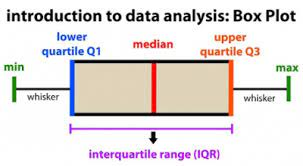

I find the IQR then check the boundary values with first quantile(.25)*1.5IQR for lower boundary and third quantile(.75)*1.5 IQR for Upper boundary.
Then for those values that are below the lower boundary and those that are above the upper boundary , replaced with lower and upper boundary respectively.

### 3. Categorical Encoding

In [ ]:
df_cpy.columns

In [ ]:
#Dummy Encoding of column Holiday
df_cpy.Holiday=df_cpy.Holiday.replace(['No Holiday','Holiday'],[1,0])

In [ ]:
#Dummy Encoding of column Functioning day
df_cpy.Functioning_day=df_cpy.Functioning_day.replace(['Yes','No'],[1,0])

In [ ]:
# Encode your categorical columns
def one_hot_encoding(df,feature):
  df=pd.concat([df,pd.get_dummies(df[feature],prefix=feature,drop_first=True)],axis=1)
  df.drop(feature,axis=1,inplace=True)
  return df

In [ ]:
df_cpy.describe(include=['object','category']).columns

In [ ]:
#Apply One Hot Encoding to Hour and Seasons columns
for col in df_cpy.describe(include=['object','category']).columns:
  df_cpy=one_hot_encoding(df_cpy,col)

In [ ]:
df_cpy.info()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used two techniques for handling categorical data. For Holiday and Functioning day i used dummification techinique. 
As the column Hour has a specific range(0-23)so i considered it as categorical variable and i decided to use OneHotEncoding(OHE) to Hour and Seasons columns that means i created dummy variable for all these columns and remove the first column to avoid multicollernaity.
  Finally, i have 38 columns.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)
There are no text columns in the given dataset which I am working on. So, Skipping this part.

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection



#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Extracting Day of Week column
df_cpy.Date=pd.to_datetime(df_cpy.Date,format='%d/%m/%Y')
df_cpy['day of week'] = df_cpy['Date'].dt.dayofweek   #0-->Monday 1--->Tuesday and so on

In [ ]:
#Creating a new column weekday/weekend and then removing day of week and date column
df_cpy['Weekday/Weekend']=df_cpy['day of week'].apply(lambda x:1 if x==5 or x==6 else 0)
df_cpy.drop(['day of week','Date'],axis=1,inplace=True)

In [ ]:
#Checking shape of data
df_cpy.info()

I have fetched 'Weekday/Weekend' column from the Date column and remove the date column .Now I have 38 columns.

#### 2. Feature Selection

In [ ]:
# Correlation Heatmap visualization code
corr = df_cpy.corr()
cmap = cmap=sn.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


In [ ]:
# Select your features wisely to avoid overfitting
#Checking Multicollinearity via VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
#Checking VIF of all the columns
calc_vif(df_cpy[[i for i in df_cpy.describe().columns]])

In [ ]:
#Checking VIF after removing Dew Point Temperature as having high VIF value and low correlation with the dependent variable
calc_vif(df_cpy[[i for i in df_cpy.describe().columns if i not in['Dew_point_temperature']]])

In [ ]:
#Remove column Holiday as well having high VIF and check VIF again
calc_vif(df_cpy[[i for i in df_cpy.describe().columns if i not in['Dew_point_temperature','Holiday']]])

In [ ]:
#Remove column Functioning day having high VIF value and check VIF again
calc_vif(df_cpy[[i for i in df_cpy.describe().columns if i not in['Dew_point_temperature','Holiday','Functioning_day']]])

In [ ]:
#Finally remove Humidity column having high VIF value and calculate VIF again
calc_vif(df_cpy[[i for i in df_cpy.describe().columns if i not in['Dew_point_temperature','Holiday','Functioning_day','Humidity']]])

In [ ]:
#Removing all the columns having high VIF from the dataset
df_cpy.drop(['Dew_point_temperature','Holiday','Functioning_day','Humidity'],axis=1,inplace=True)

In [ ]:
#Now all features have VIF<10 
calc_vif(df_cpy[[i for i in df_cpy.describe().columns]])

In [ ]:
#heatmap
corr = df_cpy.corr()
cmap = cmap=sn.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())


##### What all feature selection methods have you used  and why?

I have dropped columns having multicolinearity and validate through VIF.Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable which is least correlated with the target variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

Using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feature and found some features having VIF of more than 10  again manipulated some features and again dropped multicolinear columns to make the VIF less than 10. The features got decreased from 38 to 34. 

##### Which all features you found important and why?

From the above data, Temperature,Dew point temperature have very high VIF value so i decided to remove Dew_point_temperature as it is less correlated to the dependent variable in comparison to Temperature	and calculate VIF again.
Then I removed Holiday,Functioning day and Humidity column sequentially as having high VIF values and less correlated with the target variable.

### 5. Data Transformation

In [ ]:
# Transform Your data
# Getting symmetric and skew symmetric (positive and negative)features from the columns
symmetric_feature=[]
pos_sk=[]
neg_sk=[]
for i in df_cpy.describe().columns:
  if abs(df_cpy[i].mean()-df_cpy[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    if (df_cpy[i].skew())>0:
      pos_sk.append(i)
    else:
      neg_sk.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
#print("Skew Symmetric Distributed Features : -",non_symmetric_feature)
print("Ps skew",pos_sk)
print("ng skew",neg_sk)

In [ ]:
# Transform Your data
for i in pos_sk[1:]:# Removing Rented bike count column from the list as it's an important factor which can't be treated as outliers here 
  df_cpy[i]=np.log(max(df_cpy[i]+1) - df_cpy[i])
  
df_cpy['Temperature']=np.square(max(df_cpy['Temperature']+1)-df_cpy['Temperature'])
df_cpy['Visibility']=np.square(max(df_cpy['Visibility']+1)-df_cpy['Visibility'])


In [ ]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in pos_sk[1:]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_cpy[col])
  sn.distplot(df_cpy[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
sn.distplot(df_cpy['Visibility'])
ax.axvline(df_cpy['Visibility'].mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df_cpy['Visibility'].median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Visibility")
plt.show()
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
sn.distplot(df_cpy['Temperature'])
ax.axvline(df_cpy['Temperature'].mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df_cpy['Temperature'].median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("Temperature")
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
Surely the data should be tranformed to approx Guassian Distribution which is good for prediction.
From the features, I got to know that there are some features which aren't symmetric either positive skewed or negative skewed so aren't following gaussian distribution and rest are having symmetric curve. Thus, for negative skewed columns I have used power(cube) transformation and for positve skewed i have used cube root transformation to achieve gaussian distribution.

I tried with other transformations and found this result best for my dataset.

### 6. Data Scaling

In [ ]:
#Created X and y dataset
X_cols=df_cpy.copy()
y=df_cpy.Rented_Bike_Count
X_cols.drop('Rented_Bike_Count',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit(X_cols)
X= X.transform(X_cols)

In [ ]:
#Normalizing the distribution of Target feature
y=np.sqrt(y)

##### Which method have you used to scale you data and why?
I have used Standard Scalar in my project as the data values follows Normal Distribution. Standardization is a scaling technique wherein it makes the data scale-free by converting the statistical distribution of the data into the below format:
mean - 0 (zero)
standard deviation - 1


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.
Dimensionality reduction is the process of reducing the number of features in a dataset while retaining as much information as possible.
This can be done to reduce the complexity of a model, improve the performance of a learning algorithm, or make it easier to visualize the data.
Techniques for dimensionality reduction include: principal component analysis (PCA), singular value decomposition (SVD), and linear discriminant analysis (LDA).


In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. 

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

I don't think so that the data is imbalanced. Usually this problem occurs in classificaion problem.
Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations. 
Data 

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Creating function for Mean Squared Error,Mean_Absolute_Error and Root Mean Squared Error 
#r2 and adjusted r2
def metric_score_chart(y_pred,y_test):
  MSE  = mean_squared_error(np.square(y_test),np.square(y_pred))
  print("MSE :" , MSE)

  MAE=mean_absolute_error(np.square(y_test), np.square(y_pred))
  print("MAE :" ,MAE)

  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  r2 = r2_score(np.square(y_test), np.square(y_pred))
  print("R2 :" ,r2)
  print("Adjusted R2 : ",1-(1-r2_score(np.square(y_test), np.square(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
#Creating a function to plot the comparison between actual values and predictions
def plot_comparison(y_pred,model):
   plt.figure(figsize=(8,7))
   plt.title("The comparison of actual values and predictions obtained by "+model) 
   plt.plot(np.array((y_test)))
   plt.plot((y_pred),color='red')
   plt.legend(["Actual","Predicted"])
   plt.show()

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)#score of success of Train dataset

In [ ]:
#Prediction on test data
y_pred = reg.predict(X_test)

In [ ]:
reg.intercept_

In [ ]:
reg.coef_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calling function metric score chart
metric_score_chart(y_pred,y_test)

In [ ]:
#Calling the function plot_comparison
plot_comparison(y_pred,'Linear Regression')

In [ ]:
#Actual v/s Predicted values of test data 
plt.scatter(np.square(y_test), np.square(y_pred))
plt.xlabel('Actual rented bike count')
plt.ylabel("Predicted bike count")

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
sn.distplot((np.square(y_test)- np.square(y_pred)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

In [ ]:
### Heteroscadacity
plt.scatter(np.square(y_pred),np.square(y_test)-np.square(y_pred),c='r')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Evaluation metric Score for Linear Regression

*   MSE : 165944.63439815154
*   MAE : 283.3135015904589
*   RMSE : 407.3630253203542
*   R2 : 0.5932138175968089
*   Adjusted R2 :  0.5880388199023967 

### ML Model - 2 Lasso Regressor

In [ ]:
#Fit the Lasso model on the train dataset
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.005 , max_iter= 3000)
lasso.fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

In [ ]:
#Prediction on test data
y_pred_l = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calling function metric score chart
metric_score_chart(y_pred_l,y_test)

In [ ]:
#Calling the function plot_comparison
plot_comparison(y_pred_l,'Linear Regression')

In [ ]:
#Actual v/s Predicted test data
plt.scatter(np.square(y_test), np.square(y_pred_l))
plt.xlabel('Actual rented bike count')
plt.ylabel("Predicted bike count")

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
sn.distplot((np.square(y_test)- np.square(y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

In [ ]:
### Heteroscadacity
plt.scatter(np.square(y_pred_l),np.square(y_test)-np.square(y_pred_l),c='r')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperprarameter tuning
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
#Calling function metric score chart
metric_score_chart(y_pred_lasso,y_test)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV optimization technique as it tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   MSE : 166302.309942248
*   MAE : 283.5389611786305
*   RMSE : 407.80180227930333
*   R2 : 0.5923370343874592
*   Adjusted R2 :  0.5871508825504455
From Linear regression there is no improvement in r2 so can say model is performing same as before for alpha value .0001.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

MSE,MAE,RMSE metrics calculate the errors between actual-predicted.R2 score signifies that how much model is performing in comparison to the baseline model

### ML Model 3- Ridge Regression

In [ ]:
# ML Model - 3 Implementation
ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

In [ ]:
# Predict on the model
y_pred_r = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calling function metric score chart
metric_score_chart(y_pred_r,y_test)

In [ ]:
#Calling the function plot_comparison
plot_comparison(y_pred_r,'Linear Regression')

In [ ]:
#Actual v/s Predicted test data
plt.scatter(np.square(y_test), np.square(y_pred_r))
plt.xlabel('Actual rented bike count')
plt.ylabel("Predicted bike count")

In [ ]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
sn.distplot((np.square(y_test)- np.square(y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

In [ ]:
### Heteroscadacity
plt.scatter(np.square(y_pred_r),np.square(y_test)-np.square(y_pred_r),c='r')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

Here,we got the same result as with Lasso regression.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

In [ ]:
# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#Calling function metric score chart
metric_score_chart(y_pred_ridge,y_test)

Here we got the same result as in case of Lasso regression (no improvement)

### ML Model 4- RandomForest Regression

In [ ]:
# ML Model - 4 Implementation
rand_forest = RandomForestRegressor()

parameters = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=20, num=5)], 
             'max_depth' : [10,15,20],
             'min_samples_split':[2,4],
             'min_samples_leaf':[1,2],
             'bootstrap' : [True,False]
             }

rf_model_grid = GridSearchCV(rand_forest,parameters,scoring='r2',cv=5)
# Fit the Algorithm
rf_model_grid.fit(X_train,y_train)

In [ ]:
#Getting the best parameters for Random Forest regression fetched through GridSearchCV
print(f'The best value for parameters in random forest regression through GridSearchCV is found to be {rf_model_grid.best_params_}')
print(f'\nUsing {rf_model_grid.best_params_} as the value for the parameters in random forest model, it gives us a negative mean squared error of: {rf_model_grid.best_score_}')

In [ ]:
#Fitting Random Forest model on the dataset with appropriate paramter values
rf_model = RandomForestRegressor(bootstrap=True,max_depth=20,min_samples_leaf=2,min_samples_split=4,n_estimators=15).fit(X_train,y_train)

In [ ]:
#Predicting values of the independent variable on the test set
Y_test_pred_rf = rf_model_grid.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Calling function metric score chart
metric_score_chart(Y_test_pred_rf,y_test)

##### Which hyperparameter optimization technique have you used and why?

Here also I have used GridSearchCv as it tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   MSE : 100277.97171403009
*   MAE : 184.34893352694257 
*   RMSE : 316.66697288165386
*   R2: 0.754184921732306
*   Adjusted R2 :  0.7510577445608203 

Yes in this model r2 and adjusted r2 is increased drastically from 0.59 to 0.75.
MSE, MAE and RMSE is also decreased significantly.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I like to choose MSE,MAE and RMSE metrics as the indicated the possible outcome of errors.
But r2 and adjusted r2 shows the clear picture of performance as it compares the result with the baseline model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have Random Forest Regressor as the best model as
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model explainability refers to the concept of being able to understand the machine learning model. For example – If a healthcare model is predicting whether a patient is suffering from a particular disease or not. The medical practitioners need to know what parameters the model is taking into account or if the model contains any bias. So, it is necessary that once the model is deployed in the real world. Then, the model developers can explain the model.

Popular techniques for model explainability:

LIME
SHAP
ELI-5
In this project I'll be using SHAP for model explainability. Among the various methods in SHAP I'll be using the SHAP summary plot, which plots features/columns in order of their impact on the predictions and also plots the SHAP values.

In [ ]:
#Installing the shap library
!pip install shap

In [ ]:
#Initialising javascript for visualisation of SHAP
import shap

In [ ]:
#Creating a function to plot the shap summary plot
def shap_summary(model):
   explainer_shap = shap.Explainer(model=model, masker=X_train)
   shap_values = explainer_shap.shap_values(X_train)
   shap.summary_plot(shap_values,X_train,feature_names=X_cols.columns)

In [ ]:
#Plotting shap summary plot for linear regression
shap_summary(reg)

In [ ]:
#Plotting shap summary plot for lasso regression
shap_summary(lasso)

In [ ]:
#Plotting shap summary plot for Ridge regression
shap_summary(ridge)

In [ ]:
#Plotting shap summary plot for Random forest regression model
explainer_shap = shap.Explainer(model=rf_model, masker=X_train)
shap_values = explainer_shap.shap_values(X_train,check_additivity=False)
shap.summary_plot(shap_values,X_train,feature_names=X_cols.columns)

We see that different importance or impact power is given to the features by each model and that defines how well the model performs on prediction. Random forest gives almost all the features a significant impact power and therefore it performs the best out of all the 4 models.

By looking at the SHAP summary plot for each model, we can figure out the feature importance and also its impact power by understanding the SHAP values.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
import pickle

In [ ]:
# Save the File
with open("model_pickle","wb")as f:
  pickle.dump(rf_model,f)
  

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
with open("model_pickle","rb")as f:
  model=pickle.load(f)

In [ ]:
res=model.predict([[10000,1,1,1,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1]])
#Square the result to get actual result
res=np.square(res)
print(int(res))

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Conclusion:

---


EDA insights:<br>
Most number of bikes are rented in the Summer season and the lowest in the winter season.<br>
There is no bike demand on non Functioning day.<br>
Most number of bikes are rented in the temperature range of 15 degrees to 30 degrees.<br>
Most number of bikes are rented when there is no snowfall or rainfall.<br>
Majority of the bikes are rented for a humidity percentage range of 30 to 70.<br>
The highest number of bike rentals have been done in the 18th hour, i.e 6pm, and lowest in the 4th hour, i.e 4am.<br>
Most of the bike rentals have been made when there is high visibility.<br><br>

Results from ML models:<br>
Random Forest Regression is the best performing model with an r2 score of 0.75.<br>
Linear Regression,Lasso Regression(L1 regularization) and Ridge Regression are performing the same with an r2 score of 0.59.<br>
Actual vs Prediction visualisation is done for all the 4 models with cv technique.<br>
All 4 models have been explained with the help of SHAP library.<br>
Temperature is the most important factor according to all the models.<br><br>
Challenges faced:<br>
Removing Outliers.<br>
Encoding the categorical columns.<br>
Removing Multicollinearity from the dataset.<br>
Choosing Model explainability technique.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***